# Task M5 T01
## Introduction to Hypothesis Testing and Machine Learning

Description:
Hypothesis Testing exercises.

#### - Exercise 1

Download the attached dataset of official UEFA data and select an attribute from the dataset. Calculate the p-value and say whether it rejects the null hypothesis by taking an alpha of 5%.

In [20]:
import pandas as pd

df_main = pd.read_csv('Lligues europees UEFA.csv', sep=';', encoding = 'ISO-8859-1',index_col=0, engine='python')

df_main.info()
df_main.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 98
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Squad            98 non-null     object 
 1   Country          98 non-null     object 
 2   LgRk             98 non-null     int64  
 3   MP               98 non-null     int64  
 4   W                98 non-null     int64  
 5   D                98 non-null     int64  
 6   L                98 non-null     int64  
 7   GF               98 non-null     int64  
 8   GA               98 non-null     int64  
 9   GD               98 non-null     int64  
 10  Pts              98 non-null     int64  
 11  Pts/G            98 non-null     float64
 12  xG               98 non-null     float64
 13  xGA              98 non-null     float64
 14  xGD              98 non-null     float64
 15  xGD/90           98 non-null     float64
 16  Last 5           98 non-null     object 
 17  Attendance       9

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
Rk,,,,,,,,,,,,,,,,,,,,
1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


Seleccionamos la variable a estudiar

In [24]:
df_main['W'].describe().round(2)

count    98.00
mean     13.45
std       5.75
min       3.00
25%       9.00
50%      13.00
75%      17.00
max      28.00
Name: W, dtype: float64

Step1.- Select a variable reference.

Describimos las variables en el data set:

- Squad: Name of the team.
- Country: Country where the computer is located.
- LgRk: The position of the team in the league table.
- MP: The number of games played by the team in the league.
- W: The number of matches won by the team in the league.
- D: The number of games tied by the team in the league.
- L: The number of games lost by the team in the league.
- GF: The number of goals scored by the team in the league.
- GA: The number of goals conceded by the team in the league.
- GD: The goal difference of the team in the league (GF - GA).
- Pts: The number of points obtained by the team in the league.
- Pts/G: The average number of points obtained by the team per game.
- xG: The expected value of the goals scored by the team based on the chances created.
- xGA: The expected value of the goals conceded by the team based on the opportunities granted.
- xGD: The team's expected goal difference based on chances created and conceded (xG - xGA).
- xGD/90: The team's expected goal difference per game based on chances created and conceded.
- Last 5: The team's performance in its last five games.
- Attendance: The average number of attendees at the team's matches.
- Top Team Scorer: The player from the team that scored the most goals in the league.
- Goalkeeper: The team's starting goalkeeper in the league.

Definimos las hipotesis a comprobar.

In [5]:
# contar el número total de valores nulos en el DataFrame
total_nulos = df_main.isnull().sum().sum()

# calcular el porcentaje de valores nulos en el DataFrame
porcentaje_nulos = (total_nulos / (df_main.shape[0] * df_main.shape[1])) * 100

# imprimir el número total de valores nulos y el porcentaje de valores nulos
print("Número total de valores nulos: ", total_nulos)
print("Porcentaje de valores nulos: ", porcentaje_nulos, "%")

# obtener un resumen de los valores nulos por columna
resumen_nulos = df_main.isnull().sum()
print("\nResumen de valores nulos por columna:\n", resumen_nulos)

# obtener un resumen de los valores no nulos por columna
resumen_no_nulos = df_main.notnull().sum()
print("\nResumen de valores no nulos por columna:\n", resumen_no_nulos)

# obtener un resumen de los valores únicos por columna
resumen_unicos = df_main.nunique()
print("\nResumen de valores únicos por columna:\n", resumen_unicos)


Número total de valores nulos:  0
Porcentaje de valores nulos:  0.0 %

Resumen de valores nulos por columna:
 Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

Resumen de valores no nulos por columna:
 Squad              98
Country            98
LgRk               98
MP                 98
W                  98
D                  98
L                  98
GF                 98
GA                 98
GD                 98
Pts                98
Pts/G              98
xG                 98
xGA                98
xGD                98
xGD/90             98
Last 5             98
Attendance         98
Top Team Scorer   

ValueError: Could not interpret value `Puntos` for parameter `x`

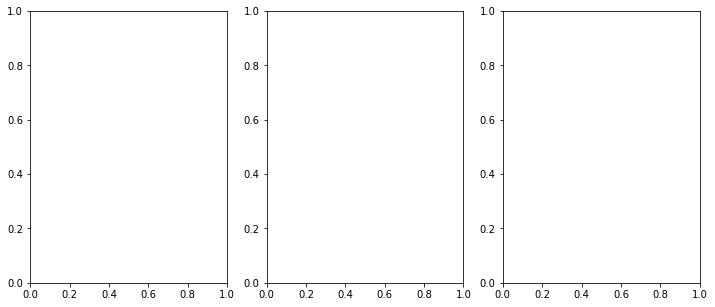

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el DataFrame
df = df_main

# Crear una figura con tres subplots
fig, axs = plt.subplots(ncols=3, figsize=(12, 5))

# Graficar la distribución de Puntos
sns.kdeplot(ax=axs[0], data=df, x="Puntos")
axs[0].set_title("Distribución de Puntos")

# Graficar la distribución de Goles a favor
sns.kdeplot(ax=axs[1], data=df, x="Goles a favor")
axs[1].set_title("Distribución de Goles a favor")

# Graficar la distribución de Goles en contra
sns.kdeplot(ax=axs[2], data=df, x="Goles en contra")
axs[2].set_title("Distribución de Goles en contra")

# Ajustar los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


Utilizamos la prueba de hipotesis test t

In [43]:
from scipy.stats import ttest_1samp

# Seleccionar la variable de interés (Número de partidos ganados)
x = df_main['W']

# Planteamiento de la hipótesis nula y alternativa

# h0 --> La hipotesis nula planteada seran si el numero de partidos ganados es igual o menor a la media
# h1 --> La hipotesis alternativa planteada indica que el numero de partidos ganados son mayores a la media 

h0_mean = 13
h1_mean = 14
t_statistic, p_value = ttest_1samp(x, h0_mean, alternative='greater')
alpha = 0.05

# Imprimir el valor p
print("p-value:", p_value)

if p_value < alpha:
    print('Null hypothesis is rejected')
else:
    print('Null hypothesis is not rejected')

p-value: 0.22060496484947323
Null hypothesis is not rejected


Lo que indica que 

#### - Exercise 2
With the same dataset select two other attributes from the dataset. Calculate the p-values and say whether they reject the null hypothesis by taking an alpha of 5%.

In [44]:
from scipy import stats
import pandas as pd

# Select the two attributes to compare
x = df_main['LgRk'] # position of the team in the league table
y = df_main['D'] # number of games tied by the team in the league
alpha = 0.05

# Calculate the p-value
t_statistic, p_value = stats.ttest_ind(x, y)

# Print the p-value
print("p-value:", p_value)

# Test whether the null hypothesis is rejected at alpha=0.05
if p_value < alpha:
    print("Null hypothesis is rejected")
else:
    print("Null hypothesis is not rejected")


p-value: 0.1618934617852936
Null hypothesis is not rejected


#### - Exercise 3
Continue with the attached dataset and select three attributes from the dataset. Calculate the p-value and say whether it rejects the null hypothesis by taking an alpha of 5%. 

In [45]:
from scipy import stats
import pandas as pd

# Select the three attributes to compare
x = df_main['W'] # GF Full Time Home Goals
y = df_main['GA'] # GA Full Time Away Goals
z = df_main['xG'] # GD Home Team Shots
alpha = 0.05

# Calculate the p-value
f_statistic, p_value = stats.f_oneway(x, y, z)

# Print the p-value
print("p-value:", p_value)

# Test whether the null hypothesis is rejected at alpha=0.05
if p_value < alpha:
    print("Null hypothesis is rejected")
else:
    print("Null hypothesis is not rejected")


p-value: 1.0286790533346362e-77
Null hypothesis is rejected
